# HK Model with Separable Landau Interaction

## $d = 1$

#### Imports

In [6]:
from HKLnumerics import HKLseparable_1D, PhaseDiagram_1D, PlotFunctions
import numpy as np
import importlib
import matplotlib.pyplot as plt

### Single Plot

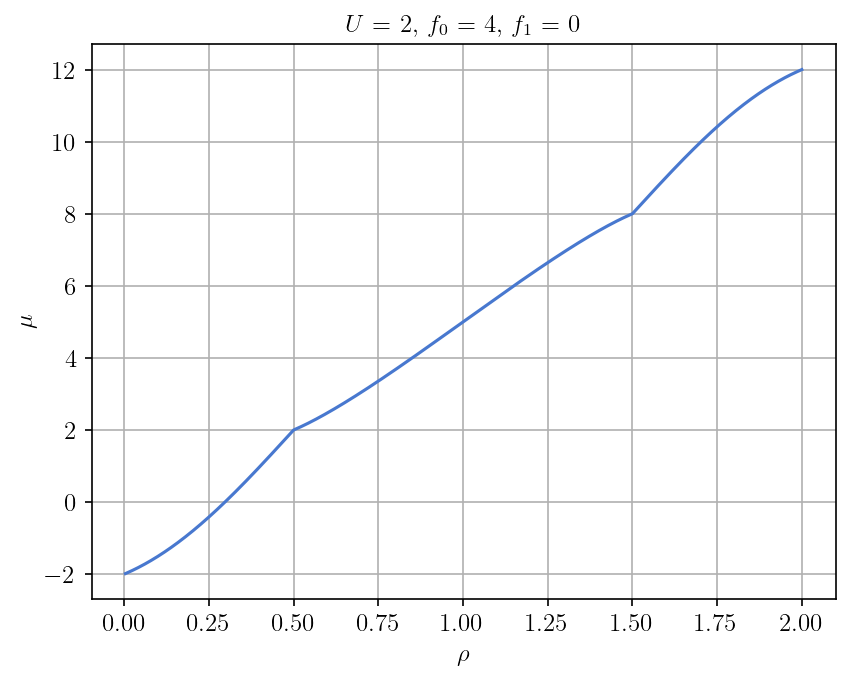

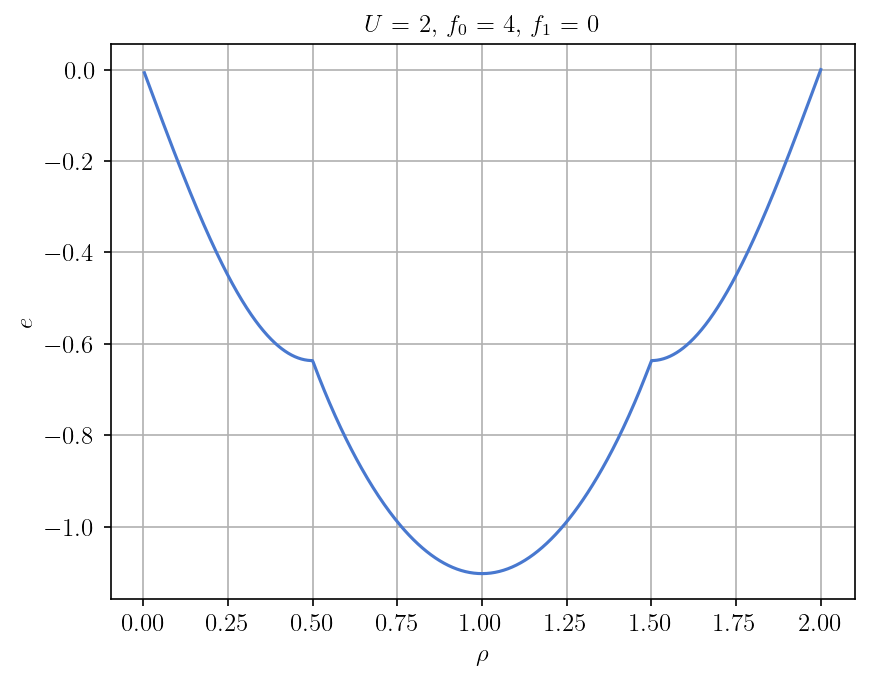

In [34]:
importlib.reload(HKLseparable_1D)

U = 2
f_0 = 4
f_1 = 0

f_0_str = r'$f_0$'
f_1_str = r'$f_1$'
U_str = r'$U$'

mu_array = HKLseparable_1D.create_mu_array(1000, U, f_0)

rho_array_single_plot, e_array_single_plot = HKLseparable_1D.create_solution_arrays_rho_e_root(mu_array, U, f_0, f_1)

PlotFunctions.one_plot(rho_array_single_plot[1:], mu_array[1:], r'$\rho$', r'$\mu$', f'{U_str} = {U}, {f_0_str} = {f_0}, {f_1_str} = {f_1}')
PlotFunctions.one_plot(rho_array_single_plot[1:], e_array_single_plot[1:], r'$\rho$', r'$e$', f'{U_str} = {U}, {f_0_str} = {f_0}, {f_1_str} = {f_1}')

#### Energy Density

Progress: 99.9%                    

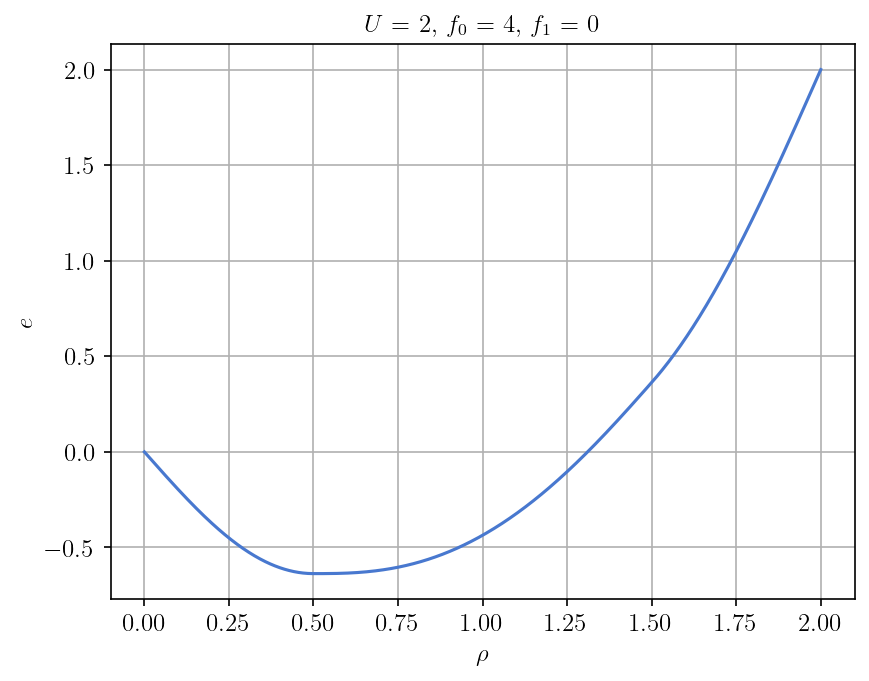

In [35]:
energy_array_single_plot = HKLseparable_1D.create_energy_array(mu_array, rho_array_single_plot, e_array_single_plot, U, f_0, f_1)
PlotFunctions.one_plot(rho_array_single_plot, energy_array_single_plot, r'$\rho$', r'$e$', f'{U_str} = {U}, {f_0_str} = {f_0}, {f_1_str} = {f_1}')

### $U = const.$, Investigate effect of $f_1$

In [15]:
importlib.reload(HKLseparable_1D)

plt.style.use('seaborn-v0_8-muted')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "lmodern",
    "font.size": 12,
    "axes.titlesize": 12,
    "axes.labelsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
})

U_1d_f1 = 6
f0 = 0
f1s_1d = [0, 0.5, 1, 1.5]
#f1s_1d = [1.56, 1.57, 1.58]
N = 10000


str_f_1 = r'$f_1 t$'
f1_1d_labels = []
rhos_1d_f1s = []
mus_1d_f1s_list = []
es_1d_f1s = []


mu_2d_f1s = HKLseparable_1D.create_mu_array(N, U_1d_f1, f0)
#mu_2d_f1s = np.linspace(-0.1, 0.1, N)

for f_1_val in f1s_1d:
    f1_1d_labels.append(f'{str_f_1} = {f_1_val}')

    rho_arr_f1, e_arr_f1 = HKLseparable_1D.create_solution_arrays_rho_e_root(mu_2d_f1s, U_1d_f1, f0, f_1_val, integral=False)

    rhos_1d_f1s.append(rho_arr_f1[1:])
    es_1d_f1s.append(e_arr_f1[1:])
    mus_1d_f1s_list.append(mu_2d_f1s[1:])

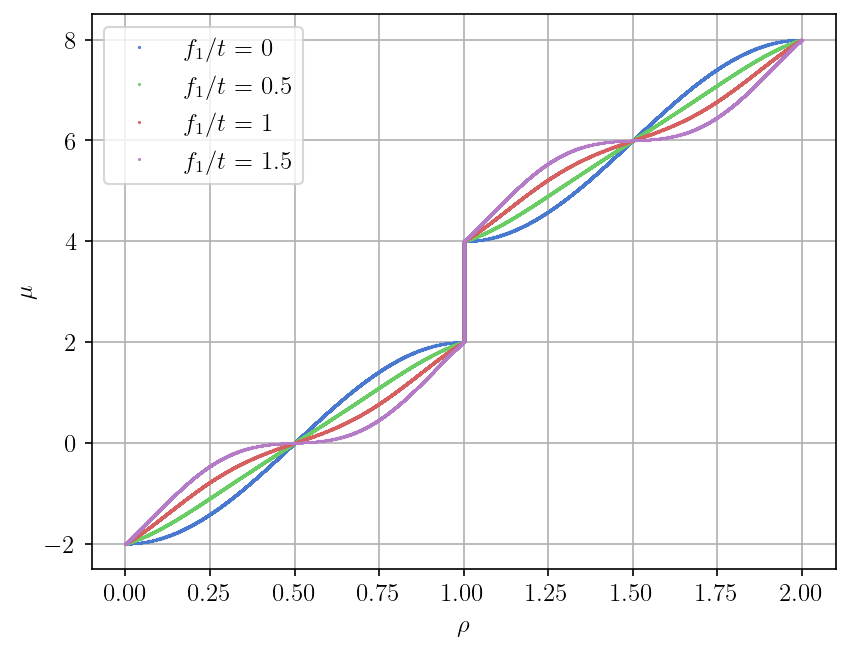

In [8]:
importlib.reload(PlotFunctions)
PlotFunctions.many_plots(f1_1d_labels, rhos_1d_f1s, mus_1d_f1s_list, r'$\rho$', r'$\mu$', points=True)

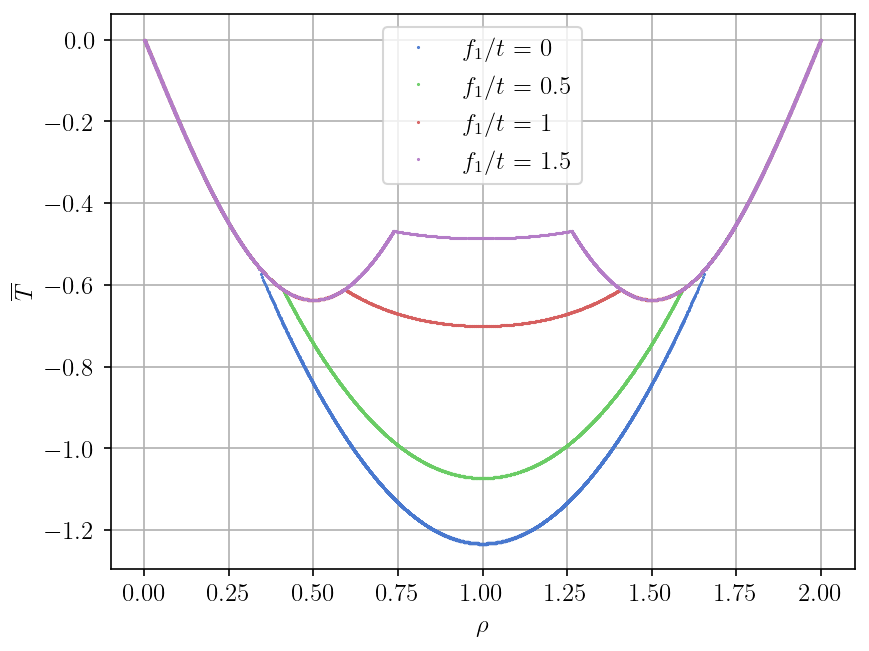

In [761]:
PlotFunctions.many_plots(f1_1d_labels, rhos_1d_f1s, es_1d_f1s, r'$\rho$', r'$\overline{T}$', points=True)

In [520]:
print(np.min(es_1d_f1s[1]))

-0.6366197449575297


That's $\frac{2}{\pi} $.

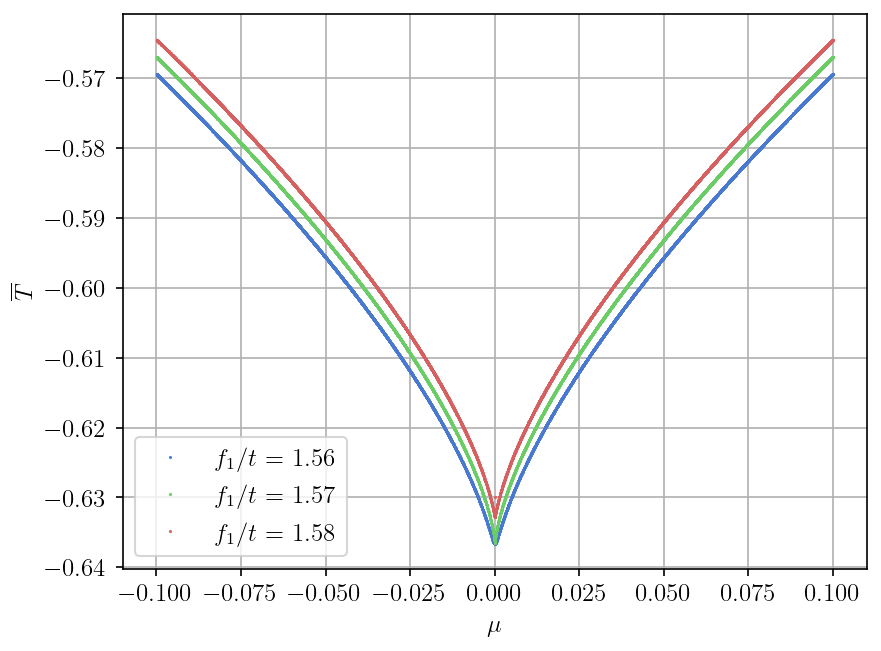

In [656]:
PlotFunctions.many_plots(f1_1d_labels, mus_1d_f1s_list, es_1d_f1s, r'$\mu$', r'$\overline{T}$', points=True)

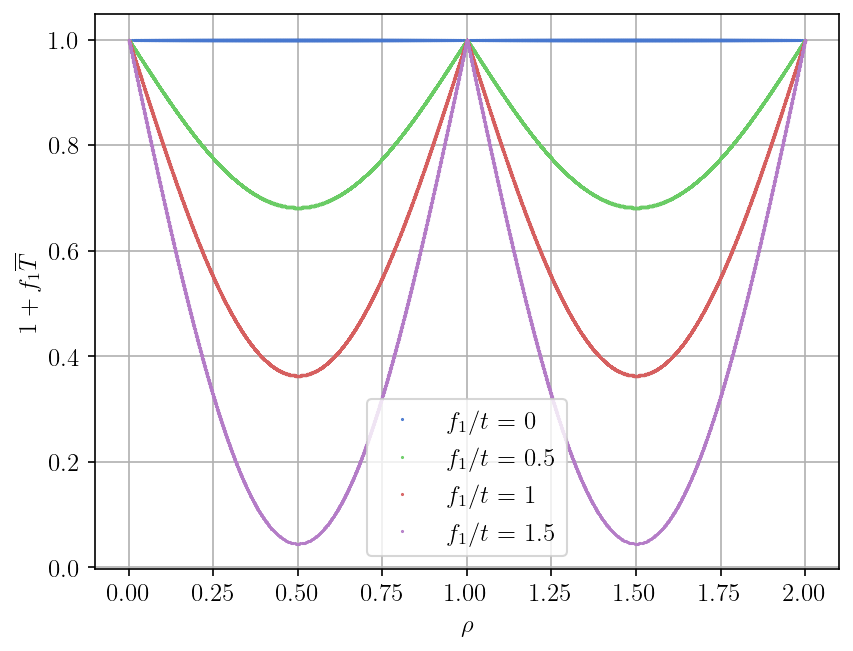

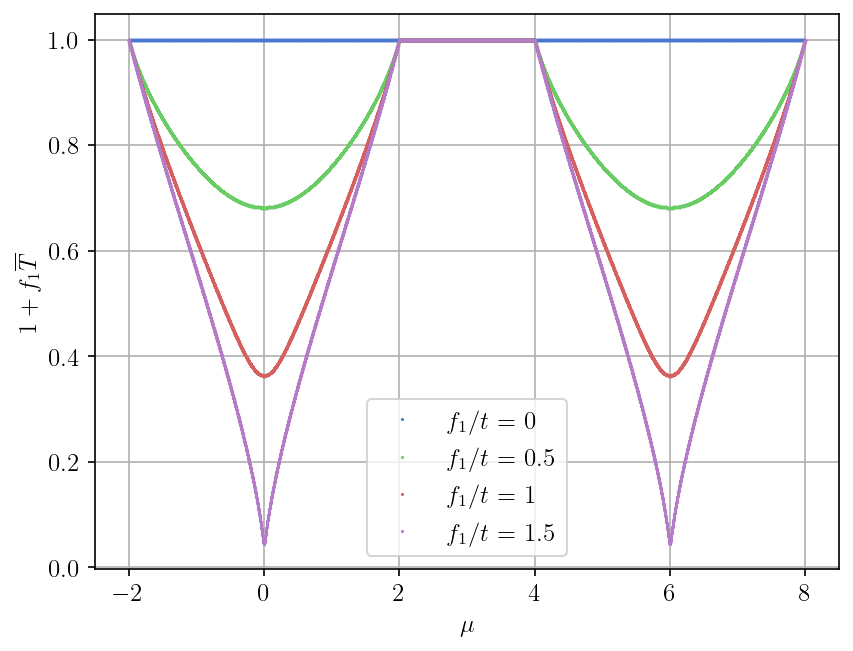

0.04507269217341103


In [9]:
ys = [1 + f1s_1d[i] * es_1d_f1s[i] for i in range(len(f1s_1d))]
PlotFunctions.many_plots(f1_1d_labels, rhos_1d_f1s, ys, r'$\rho$', r'$1 + f_1 \overline{T}$', points=True)
PlotFunctions.many_plots(f1_1d_labels, mus_1d_f1s_list, ys, r'$\mu$', r'$1 + f_1 \overline{T}$', points=True)
print(np.min(ys))

In [10]:
importlib.reload(HKLseparable_1D)

kappas_1d_f1s = [HKLseparable_1D.create_kappa_array(mus_1d_f1s_list[i], es_1d_f1s[i], U_1d_f1, f1s_1d[i]) for i in range(len(mus_1d_f1s_list))]

Progress: 100.0%                    

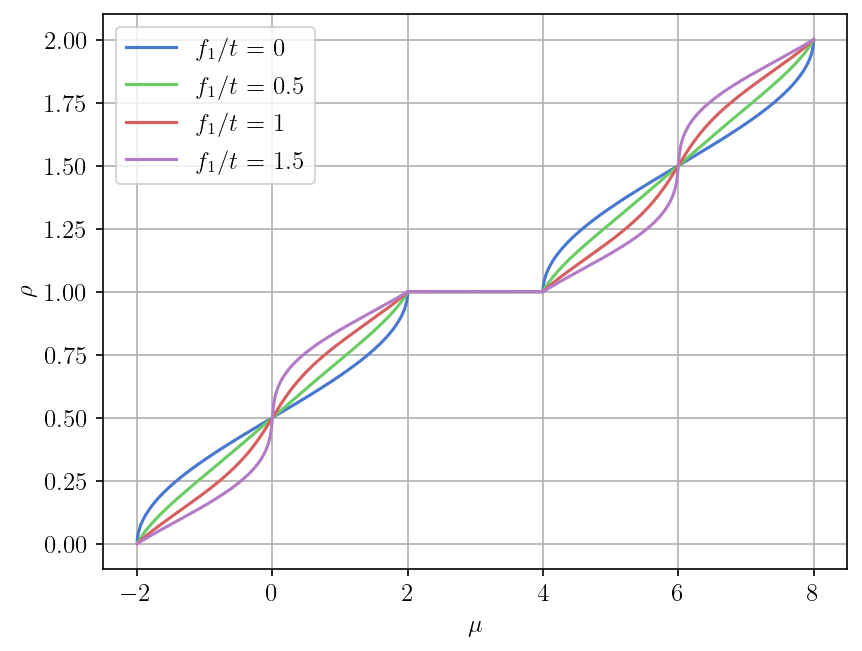

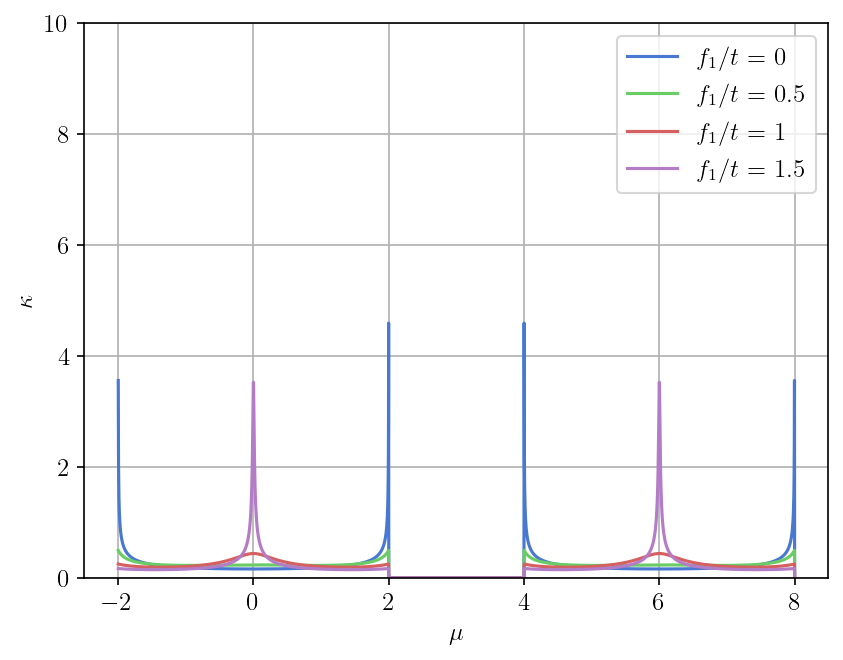

In [15]:
importlib.reload(PlotFunctions)
PlotFunctions.many_plots(f1_1d_labels, mus_1d_f1s_list, rhos_1d_f1s, r'$\mu$', r'$\rho$')
PlotFunctions.many_plots(f1_1d_labels, mus_1d_f1s_list, kappas_1d_f1s, r'$\mu$', r'$\kappa$', ymax=10, ymin=0)

In [11]:
U_1d_f1_weak = 1
N = 10000

rhos_1d_f1s_weak = []
mus_1d_f1s_list_weak = []
es_1d_f1s_weak = []


mu_2d_f1s_weak = HKLseparable_1D.create_mu_array(N, U_1d_f1_weak, 0)

for f_1_val in f1s_1d:
    rho_arr_f1, e_arr_f1 = HKLseparable_1D.create_solution_arrays_rho_e_root(mu_2d_f1s_weak, U_1d_f1_weak, 0, f_1_val)

    rhos_1d_f1s_weak.append(rho_arr_f1[1:])
    es_1d_f1s_weak.append(e_arr_f1[1:])
    mus_1d_f1s_list_weak.append(mu_2d_f1s_weak[1:])

ys_weak = [1 + f1s_1d[i] * es_1d_f1s_weak[i] for i in range(len(f1s_1d))]

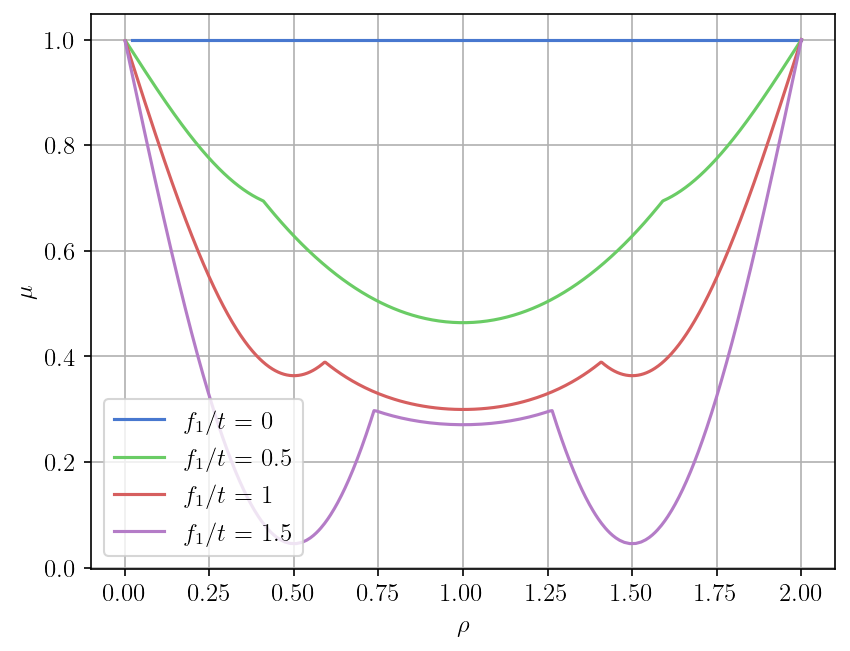

In [15]:
PlotFunctions.many_plots(f1_1d_labels, rhos_1d_f1s_weak, ys_weak, r'$\rho$', r'$\mu$', points=False)

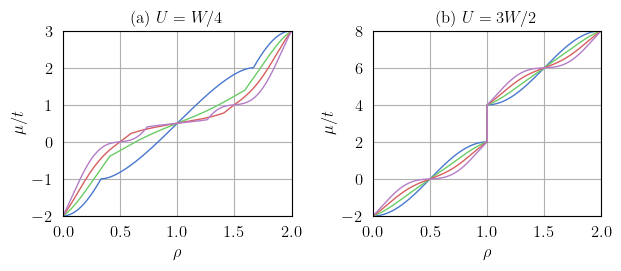

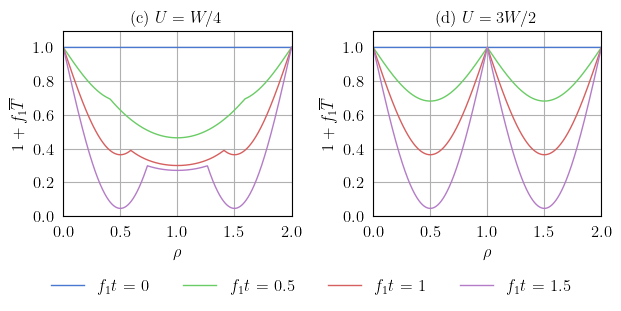

In [16]:
import importlib
importlib.reload(PlotFunctions)

plt.style.use('seaborn-v0_8-muted')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "lmodern",
    "font.size": 12,
    "axes.titlesize": 12,
    "axes.labelsize": 12,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
})


PlotFunctions.thesis_doubleplot_multiple_lines([f1_1d_labels, f1_1d_labels], [rhos_1d_f1s_weak, rhos_1d_f1s], [mus_1d_f1s_list_weak, mus_1d_f1s_list],
                                               r'$\rho$', [r'$\mu / t$', r'$\mu / t$'] , [r'(a) $U=W/4$', r'(b) $U=3W/2$'], ylimits=[0.01, 0.011], yticks=[1, 2], legend=False,
                                               reverse=False, save_title='Plots/HKLseperable_mu_1d_many_f1.pdf')

PlotFunctions.thesis_doubleplot_multiple_lines([f1_1d_labels, f1_1d_labels], [rhos_1d_f1s_weak, rhos_1d_f1s], [ys_weak, ys],
                                               r'$\rho$', [r'$1 + f_1 \overline{T}$', r'$1 + f_1 \overline{T}$'], [r'(c) $U=W/4$', r'(d) $U=3W/2$'], 
                                               ylimits=[np.min(ys_weak), np.min(ys)], yticks=[0.2, 0.2], ymax=[1.1, 1.1], 
                                               reverse=False, save_title='Plots/HKLseperable_Tbar_1d_many_f1.pdf')


In [17]:
kappas_1d_f1s = [HKLseparable_1D.create_kappa_array(mus_1d_f1s_list[i], es_1d_f1s[i], U_1d_f1, f1s_1d[i]) for i in range(len(mus_1d_f1s_list))]
kappas_1d_f1s_weak = [HKLseparable_1D.create_kappa_array(mus_1d_f1s_list_weak[i], es_1d_f1s_weak[i], U_1d_f1_weak, f1s_1d[i]) for i in range(len(mus_1d_f1s_list))]

Progress: 100.0%                    

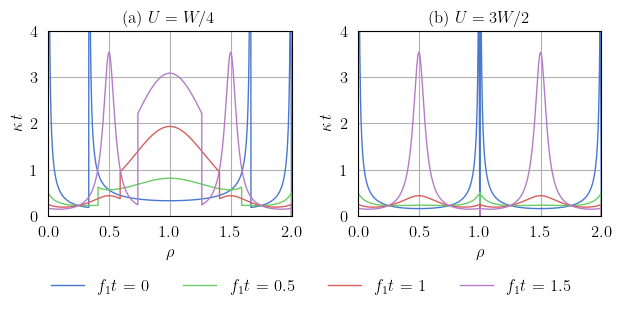

In [18]:
PlotFunctions.thesis_doubleplot_multiple_lines([f1_1d_labels, f1_1d_labels], [rhos_1d_f1s_weak, rhos_1d_f1s], [kappas_1d_f1s_weak, kappas_1d_f1s],
                                               r'$\rho$', [r'$\kappa\, t$', r'$\kappa\, t$'], [r'(a) $U=W/4$', r'(b) $U=3W/2$'],
                                                ylimits=[0, 0], yticks=[1, 1], legend=True, ymax=[4, 4],
                                               reverse=False, save_title='Plots/HKLseparable_kappa_1d.pdf')

### $f_1 = const$, investigate how different $U$ are affected

In [626]:
importlib.reload(HKLseparable_1D)

f_1 = 0.5
N = 1000

U_vals = [1, 2, 3, 4]

f_1_str = r'$f_1$'
rhos_U = []
es_U = []
mus_U = []
labels_U = []

for U_val in U_vals:
    mu_U_val = HKLseparable_1D.create_mu_array(N, U_val, 0)
    rho_U_val, e_U_val = HKLseparable_1D.create_solution_arrays_rho_e_root(mu_U_val, U_val, 0, f_1)

    labels_U.append(f'U = {U_val}')
    rhos_U.append(rho_U_val)
    es_U.append(e_U_val)
    mus_U.append(mu_U_val)

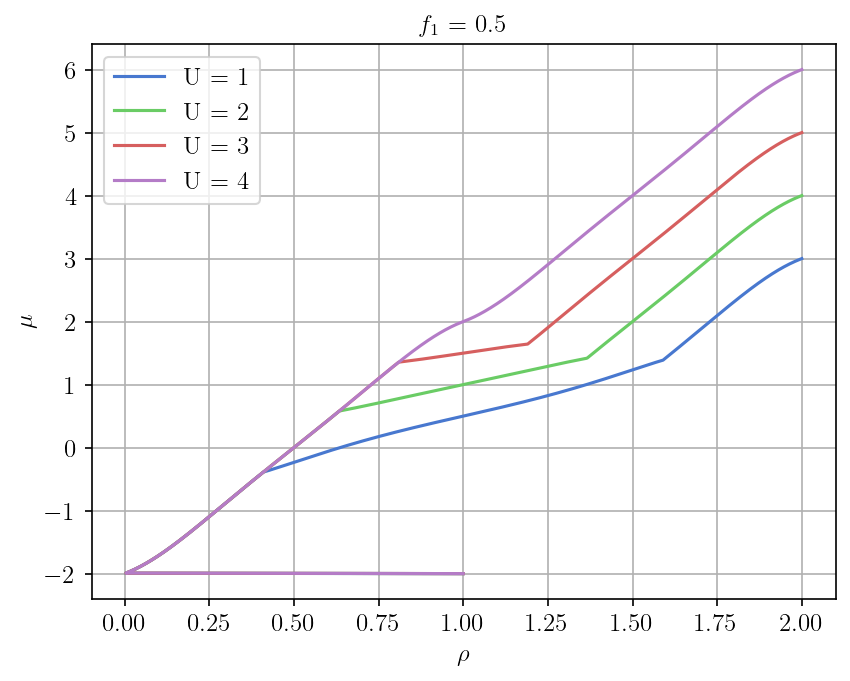

In [627]:
PlotFunctions.many_plots(labels_U, rhos_U, mus_U, r'$\rho$', r'$\mu$', title=f'{f_1_str} = {f_1}')

Second phase transition no longer at constant mu because band width is renormalized, energy of highest occupied state varies

### Phase Diagram

In [32]:
importlib.reload(PhaseDiagram_1D)
importlib.reload(HKLseparable_1D)

f1s_pd_1d = [0, 0.5, 1, 1.5]
N = 500

Ucs_1d =[]
pd_rhos_1d = []
pd_labels = []
str_f_1 = r'$f_1 t$'

for f1_val in f1s_pd_1d:
    print(f'f1 = {f1_val}')
    Uc_f1, rho_f1 = PhaseDiagram_1D.phase_diagram_landau(N, f1_val)

    pd_labels.append(f'{str_f_1} = {f1_val}')
    Ucs_1d.append(Uc_f1)
    pd_rhos_1d.append(rho_f1)
    print('\n')

pd_rhos_1d[0] -= 1

for U_arr in Ucs_1d:
    U_arr /= np.max(U_arr)


f1 = 0
Progress: 1.6%                    

Progress: 99.8%                    

f1 = 0.5
Progress: 99.8%                    

f1 = 1
Progress: 99.8%                    

f1 = 1.5
Progress: 99.8%                    



Canvas size (set)     : 3.752 in x 2.733 in = 9.53 cm x 6.94 cm
Tight bbox (rendered)  : 4.76466 in x 2.61035 in = 12.10 cm x 6.63 cm


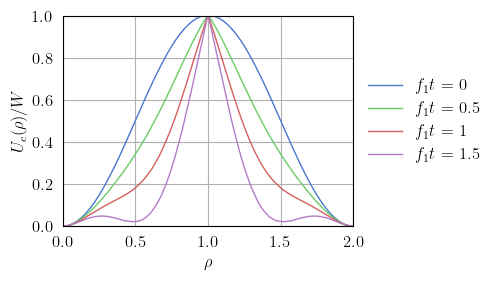

Canvas size (set)     : 3.752 in x 2.733 in = 9.53 cm x 6.94 cm
Tight bbox (rendered)  : 4.76466 in x 2.76056 in = 12.10 cm x 7.01 cm


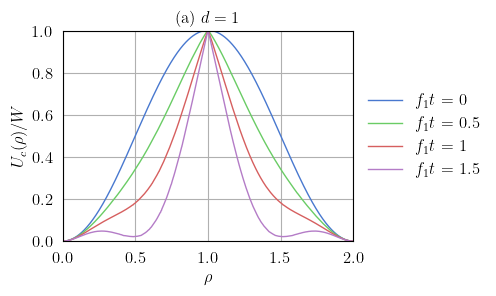

In [33]:
importlib.reload(PlotFunctions)
PlotFunctions.thesis_singleplot_multiple_lines(pd_labels[::-1], pd_rhos_1d[::-1], Ucs_1d[::-1], r'$\rho$', r'$U_c(\rho)/W$', yticks=0.2)

PlotFunctions.thesis_singleplot_multiple_lines(pd_labels[::-1], pd_rhos_1d[::-1], Ucs_1d[::-1], r'$\rho$', r'$U_c(\rho)/W$',
                                               title=r'(a) $d=1$', yticks=0.2, save_title='Plots/U_C_HKL_1d.pdf')

Seems that in the limit $f_1 \rightarrow \infty$, $U_c$ converges to
\begin{equation}
    U_c = \begin{cases}
                4td \quad &\rho = 1 \\
                0 \quad &\text{else}
            \end{cases}
\end{equation}
Interesting because phase I disappears?

## $d = 2$

### Imports

In [19]:
from HKLnumerics import HKLseparable_2D, PlotFunctions, PhaseDiagram_2D
import numpy as np
import importlib

### Chemical Potential

In [52]:
U_one = 12
f_1_one = 2

mu_2d_U_one = HKLseparable_2D.create_mu_array(100, U_one, 0)

rho_2d_U_one, e_2d_U_one = HKLseparable_2D.create_solution_arrays_rho_e_root(mu_2d_U_one, U_one, 0, f_1_one)

Progress: 100.0%                    

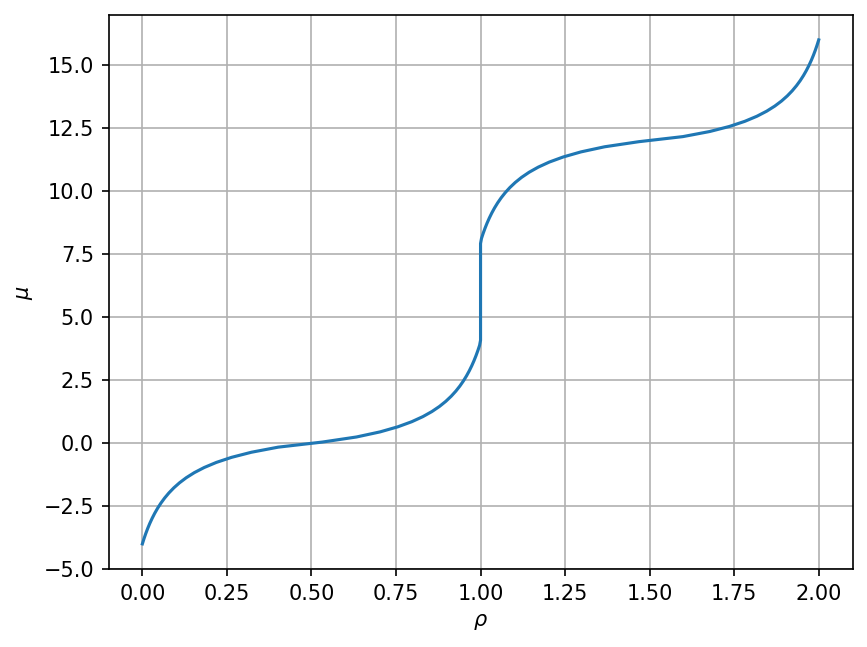

In [53]:
PlotFunctions.one_plot(rho_2d_U_one, mu_2d_U_one, r'$\rho$', r'$\mu$')

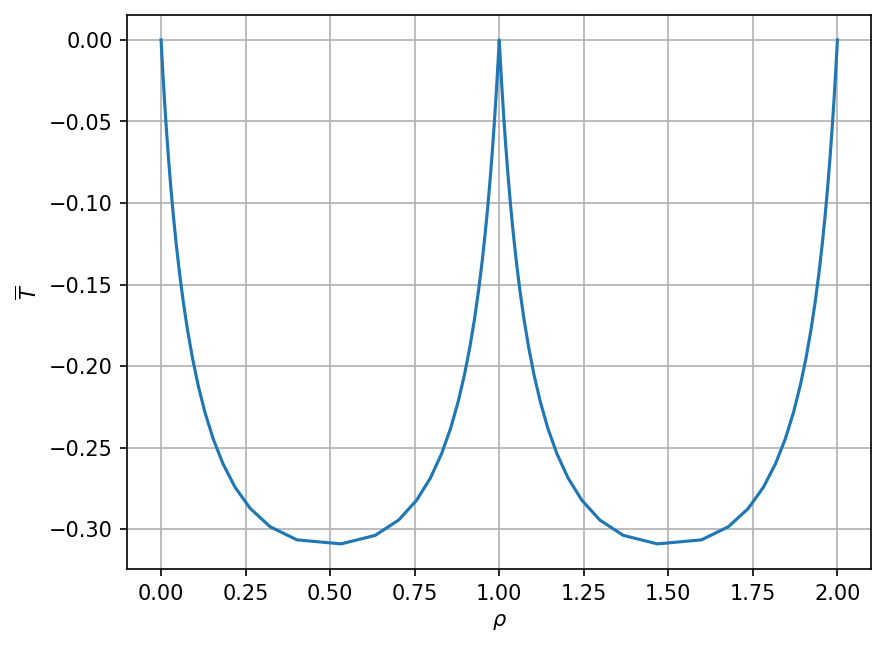

In [54]:
PlotFunctions.one_plot(rho_2d_U_one, e_2d_U_one, r'$\rho$', r'$\overline{T}$')

### Fix $U$, investigate effect of $f_1$

In [20]:
importlib.reload(HKLseparable_2D)

U_2d_f1 = 1
f1s_2d = [0, 0.4, 0.8, 1.2]
N = 2000


str_f_1 = r'$f_1 \, t$'
f_1_labels = []
rhos_2d_f1s = []
mus_2d_f1s_list = []
es_2d_f1s = []


mu_2d_f1s = HKLseparable_2D.create_mu_array(N, U_2d_f1, 0)
#mu_2d_f1s = np.linspace(-0.1, 0.1, N)

for f_1_val in f1s_2d:
    print(f'\nf_1 = {f_1_val}')

    f_1_labels.append(f'{str_f_1} = {f_1_val}')

    rho_arr_f1, e_arr_f1 = HKLseparable_2D.create_solution_arrays_rho_e_root(mu_2d_f1s, U_2d_f1, 0, f_1_val)

    rhos_2d_f1s.append(rho_arr_f1)
    es_2d_f1s.append(e_arr_f1)
    mus_2d_f1s_list.append(mu_2d_f1s)




f_1 = 0
Progress: 100.0%                    
f_1 = 0.4
Progress: 23.1%                    

/home/heinrich/Bachelorthesis/Numerics/Hatsugai-Kohmoto-Landau/HKLnumerics/HKLseparable_2D.py:35: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  int_val = integrate.quad(J_1_shifted, -np.pi, np.pi)


Progress: 100.0%                    
f_1 = 0.8
Progress: 100.0%                    
f_1 = 1.2
Progress: 100.0%                    

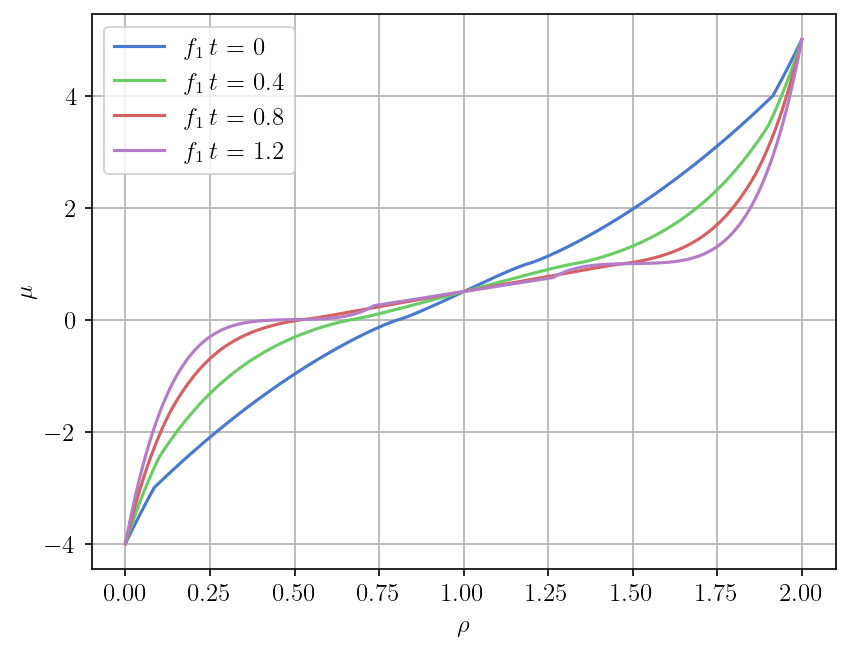

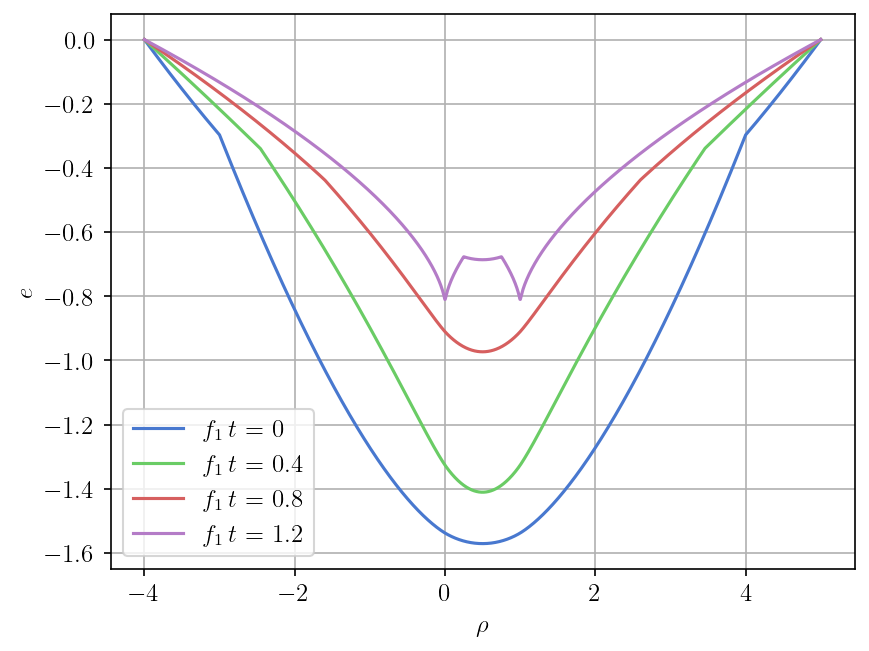

In [21]:
PlotFunctions.many_plots(f_1_labels, rhos_2d_f1s, mus_2d_f1s_list, r'$\rho$', r'$\mu$', points=False)
PlotFunctions.many_plots(f_1_labels, mus_2d_f1s_list, es_2d_f1s, r'$\rho$', r'$e$', points=False)

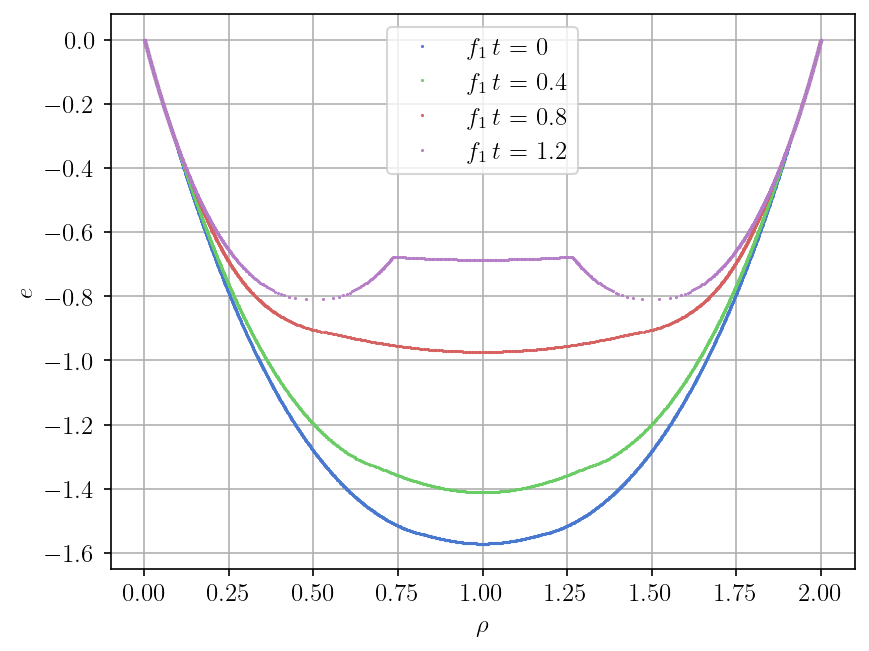

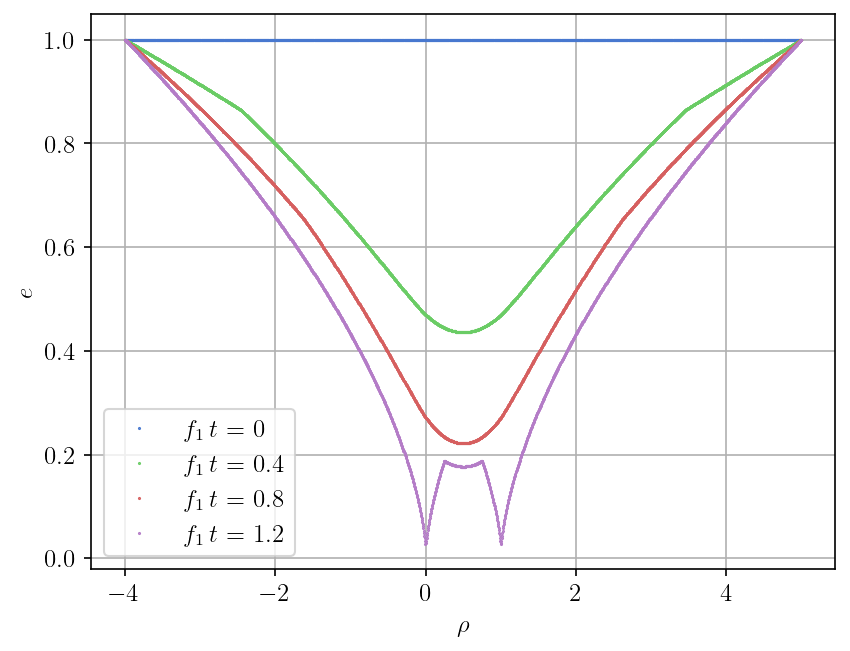

In [22]:
PlotFunctions.many_plots(f_1_labels, rhos_2d_f1s, es_2d_f1s, r'$\rho$', r'$e$', points=True)

ys = [1 + f1s_2d[i] * es_2d_f1s[i] for i in range(len(f1s_2d))]

PlotFunctions.many_plots(f_1_labels, mus_2d_f1s_list, ys, r'$\rho$', r'$e$', points=True)

In [23]:


U_2d_f1_strong = 12

N = 5000

rhos_2d_f1s_strong = []
mus_2d_f1s_list_strong = []
es_2d_f1s_strong = []

mu_2d_f1s_strong = HKLseparable_2D.create_mu_array(N, U_2d_f1_strong, 0)

for f_1_val in f1s_2d:
    print(f'\nf_1 = {f_1_val}')

    rho_arr_f1, e_arr_f1 = HKLseparable_2D.create_solution_arrays_rho_e_root(mu_2d_f1s_strong, U_2d_f1_strong, 0, f_1_val)

    rhos_2d_f1s_strong.append(rho_arr_f1)
    es_2d_f1s_strong.append(e_arr_f1)
    mus_2d_f1s_list_strong.append(mu_2d_f1s_strong)


f_1 = 0
Progress: 100.0%                    
f_1 = 0.4
Progress: 100.0%                    
f_1 = 0.8
Progress: 100.0%                    
f_1 = 1.2
Progress: 100.0%                    

In [24]:
ys_weak_2d = [1 + f1s_2d[i] * es_2d_f1s[i] for i in range(len(f1s_2d))]
ys_strong_2d = [1 + f1s_2d[i] * es_2d_f1s_strong[i] for i in range(len(f1s_2d))]

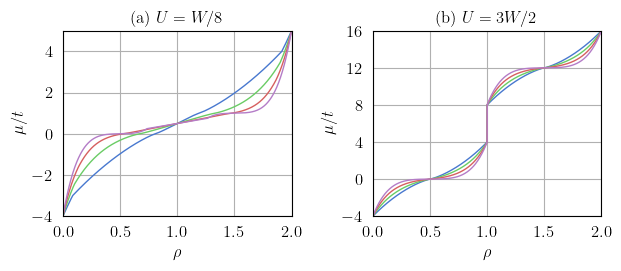

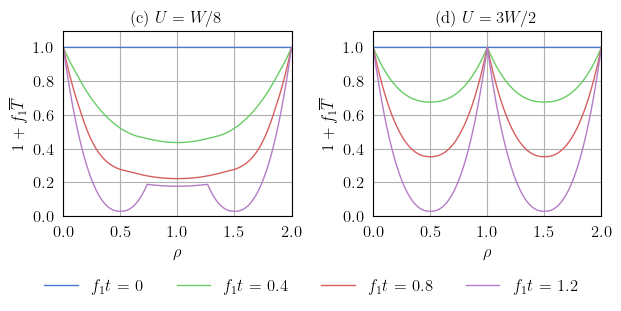

In [25]:
importlib.reload(PlotFunctions)

str_f_1 = r'$f_1 t$'

for i in range(4):
    f_1_labels[i] = f'{str_f_1} = {f1s_2d[i]}'


PlotFunctions.thesis_doubleplot_multiple_lines([f_1_labels, f1_1d_labels], [rhos_2d_f1s, rhos_2d_f1s_strong], [mus_2d_f1s_list, mus_2d_f1s_list_strong], r'$\rho$',
                                                [r'$\mu/t$', r'$\mu/t$'],
                                               [r'(a) $U=W/8$', r'(b) $U=3W/2$'], yticks=[2, 4], legend=False, reverse=False, save_title='Plots/HKLseperable_2d_mu.pdf')
PlotFunctions.thesis_doubleplot_multiple_lines([f_1_labels, f_1_labels], [rhos_2d_f1s, rhos_2d_f1s_strong], [ys_weak_2d, ys_strong_2d],
                                                r'$\rho$', [r'$1 + f_1\overline{T}$', r'$1 + f_1 \overline{T}$'],
                                               [r'(c) $U=W/8$', r'(d) $U=3W/2$'], legend=True, reverse=False, yticks=[0.2, 0.2], ylimits=[np.min(ys_weak_2d), np.min(ys_strong_2d)],
                                                ymax=[1.1, 1.1], save_title='Plots/HKLseperable_2d_T.pdf')

### Phase Diagram

In [26]:
from HKLnumerics import PhaseDiagram_2D
importlib.reload(HKLseparable_2D)
importlib.reload(PhaseDiagram_2D)

f1s_pd_2d = [0, 0.3, 0.6, 0.9]
N = 200

Ucs_2d =[]
pd_rhos_2d = []
pd_labels_2d = []
str_f_1 = r'$f_1 t$'

for f1_val in f1s_pd_2d:
    print(f'f1 = {f1_val}')
    Uc_f1, rho_f1 = PhaseDiagram_2D.phase_diagram_landau(N, f1_val)

    pd_labels_2d.append(f'{str_f_1} = {f1_val}')
    Ucs_2d.append(Uc_f1)
    pd_rhos_2d.append(rho_f1)
    print('\n')

f1 = 0
Progress: 98.5%                    

f1 = 0.3
Progress: 98.5%                    

f1 = 0.6
Progress: 98.5%                    

f1 = 0.9
Progress: 98.5%                    



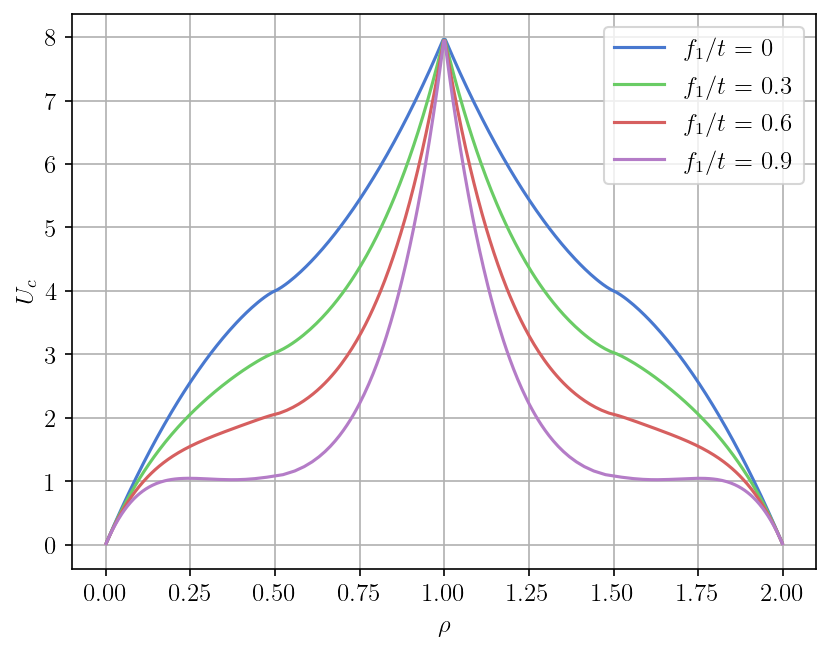

In [109]:

PlotFunctions.many_plots(pd_labels_2d, pd_rhos_2d, Ucs_2d, r'$\rho$', r'$U_c$')

Canvas size (set)     : 3.752 in x 2.733 in = 9.53 cm x 6.94 cm
Tight bbox (rendered)  : 4.76466 in x 2.76056 in = 12.10 cm x 7.01 cm


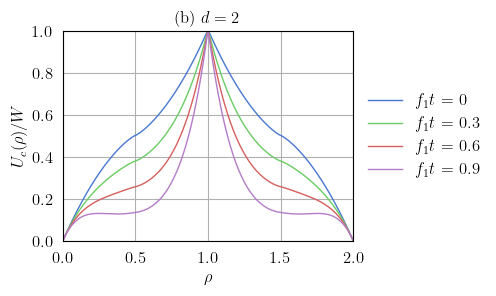

In [27]:
importlib.reload(PlotFunctions)

for U_arr in Ucs_2d:
    U_arr /= np.max(U_arr)

PlotFunctions.thesis_singleplot_multiple_lines(pd_labels_2d[::-1], pd_rhos_2d[::-1], Ucs_2d[::-1], r'$\rho$', r'$U_c(\rho)/W$', 
                                               title=r'(b) $d = 2$', yticks=0.2, save_title='Plots/U_C_HKL_2d.pdf')

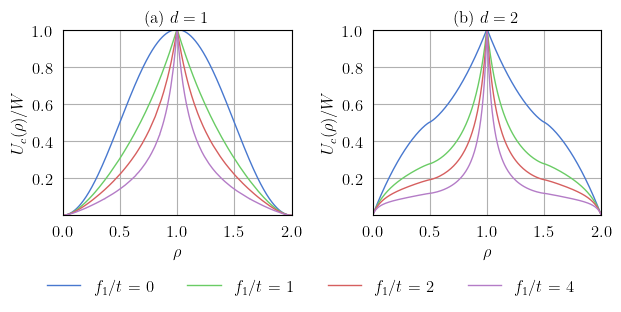

In [122]:
for U_arr in Ucs_2d:
    U_arr /= np.max(U_arr)

PlotFunctions.thesis_doubleplot_multiple_lines([pd_labels_2d, pd_labels_2d], [pd_rhos_1d, pd_rhos_2d], [Ucs_1d, Ucs_2d], r'$\rho$', [r'$U_c(\rho) / W$', r'$U_c(\rho) / W$'],
                                               [r'(a) $d=1$', r'(b) $d=2$'], yticks=[0.2, 0.2], reverse=False, save_title='Plots/HKLseparable_pd_1d2d.pdf')

## $d=3$

### Imports

In [13]:
from HKLnumerics import HKLseparable_3D, PlotFunctions
import numpy as np

In [4]:
print(np.__version__)

2.2.5


In [107]:
import importlib
importlib.reload(HKLseparable_3D)

U_3d_one = 18
f_1_3d_one = 1

mu_3d_U_one = HKLseparable_3D.create_mu_array(100, U_3d_one, 0)

rho_3d_U_one, e_3d_U_one = HKLseparable_3D.create_solution_arrays_rho_e_root(mu_3d_U_one, U_3d_one, 0, f_1_3d_one, use_fixed_point=True)

Progress: 100.0%                    

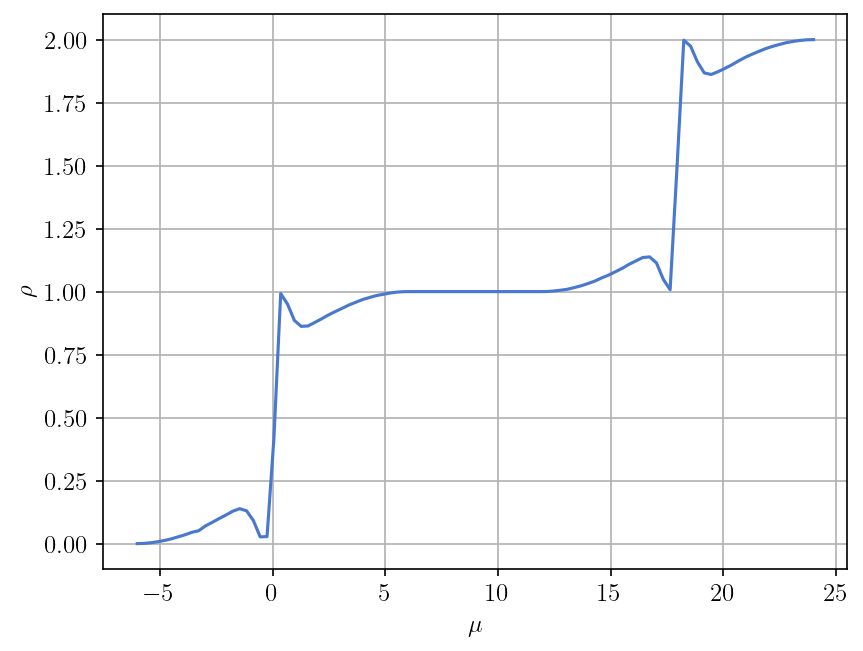

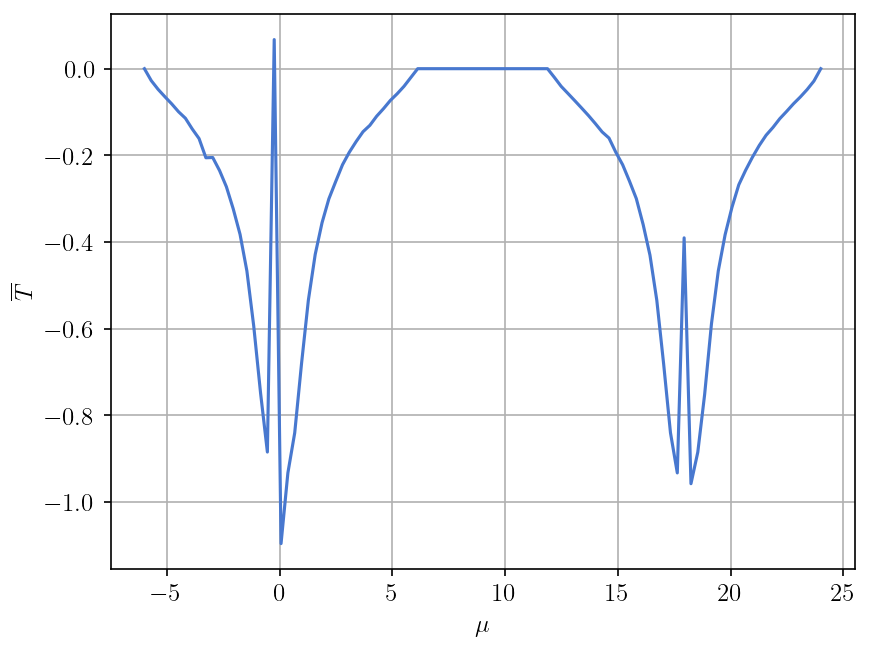

In [108]:
PlotFunctions.one_plot(mu_3d_U_one, rho_3d_U_one, r'$\mu$', r'$\rho$')
PlotFunctions.one_plot(mu_3d_U_one, e_3d_U_one, r'$\mu$', r'$\overline{T}$')

In [6]:
U_3d_f1 = 16
f1s_3d = [0, 4]
N = 100


str_f_1 = r'$f_1$'
f_1_labels = []
rhos_3d_f1s = []
mus_3d_f1s_list = []
es_3d_f1s = []


mu_3d_f1s = HKLseparable_3D.create_mu_array(N, U_3d_f1, 0)

for f_1_val in f1s_3d:
    print(f'\nf_1 = {f_1_val}')

    f_1_labels.append(f'{str_f_1} = {f_1_val}')

    rho_arr_f1, e_arr_f1 = HKLseparable_3D.create_solution_arrays_rho_e_root(mu_3d_f1s, U_3d_f1, 0, f_1_val)

    rhos_3d_f1s.append(rho_arr_f1)
    es_3d_f1s.append(e_arr_f1)
    mus_3d_f1s_list.append(mu_3d_f1s)


f_1 = 0
Progress: 99.0%                    

/Users/marieheinrich/Desktop/Hatsugai-Kohmoto-Landau/HKLnumerics/HKLseparable_3D.py:37: RuntimeWarning: divide by zero encountered in divide
  - 1 / (np.pi * np.sqrt(np.square(2 * t * y) - np.square(x))),


Progress: 100.0%                    
f_1 = 4
Progress: 100.0%                    

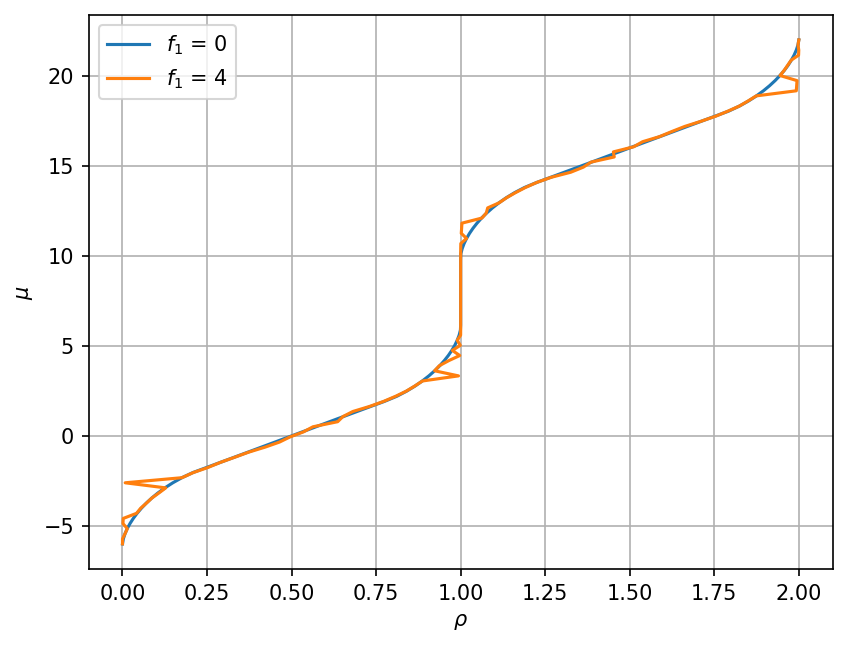

In [7]:
PlotFunctions.many_plots(f_1_labels, rhos_3d_f1s, mus_3d_f1s_list, r'$\rho$', r'$\mu$')